# Spam Classifier

Data obtained from [Kaggle](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)

I roughly followed along with this [lesson](https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners) on Kaggle

## Import CSV

* Complete Imports
* Prepare CSV for model

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline


In [431]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.columns = ['label', 'text']


## Data Exploration

In [432]:
data.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [433]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [434]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [435]:
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})
data



,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [436]:
# Get a sense of what non-spam looks like
data[data.label == 'ham'].head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
6,ham,Even my brother is not like to speak with me. ...,0


In [437]:
# Examples of spam messages. Yikes!
data[data.label == 'spam'].head()

,label,text,label_num
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


<Axes: >

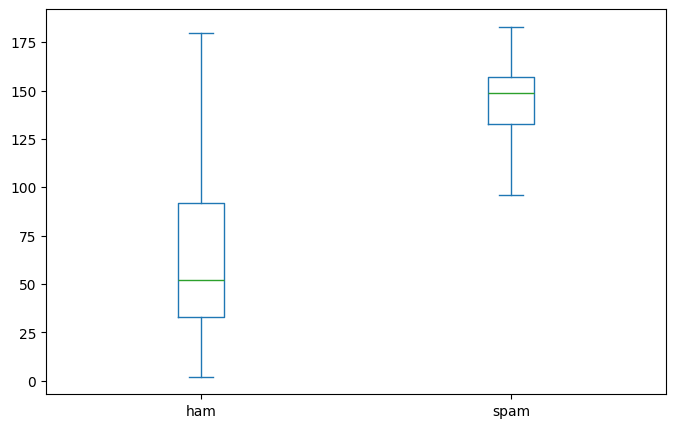

In [438]:
# Create Box plots of text length, for spam (1) and non-spam (0) messages. Outliers are not shown.
data["text_length"] = data["text"].apply(len)
data.pivot(columns = 'label', values = 'text_length').plot(kind='box', figsize=(8,5), showfliers=False)

Text(0.5, 0, 'Message Length')

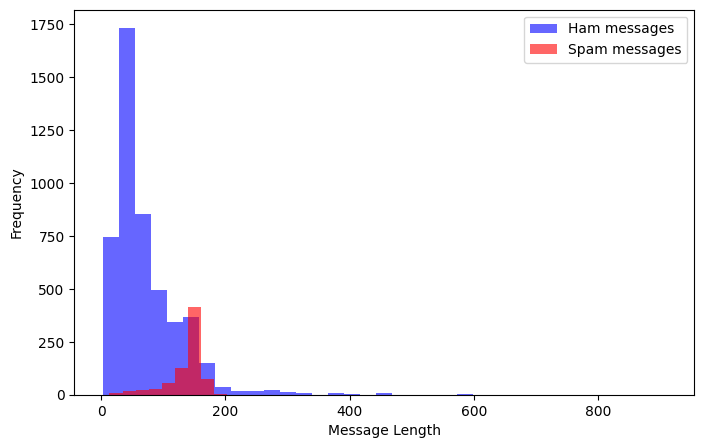

In [439]:
plt.figure(figsize=(8, 5))

data[data.label=="ham"].text_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
data[data.label=="spam"].text_length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")

## Pre-processing

In [440]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [441]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    """
    STOPWORDS = stopwords.words('english') #+ ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    clean = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

    return clean


data['clean_text'] = data.text.apply(text_process)
data

,label,text,label_num,text_length,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried 2 contact u U å£750 Pound prize...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...


## Find most common words in spam and ham

In [442]:
from collections import Counter

def make_lower(text):
    return [word.lower() for word in text.split()]

In [443]:
words = data[data.label == 'ham'].clean_text.apply(make_lower)
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

pprint.pp(ham_words.most_common(50))

[('u', 972),
 ('im', 449),
 ('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 257),
 ('go', 247),
 ('ur', 240),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('4', 168),
 ('going', 167),
 ('want', 163),
 ('one', 162),
 ('home', 160),
 ('lor', 160),
 ('need', 156),
 ('sorry', 153),
 ('still', 146),
 ('see', 137),
 ('n', 134),
 ('later', 134),
 ('da', 131),
 ('r', 131),
 ('back', 129),
 ('think', 128),
 ('well', 126),
 ('today', 125),
 ('send', 123),
 ('tell', 121),
 ('cant', 118),
 ('ì', 117),
 ('hi', 117),
 ('take', 112),
 ('much', 112),
 ('oh', 111),
 ('night', 107),
 ('hey', 106),
 ('happy', 105),
 ('great', 100),
 ('way', 100)]


In [444]:
words = data[data.label == 'spam'].clean_text.apply(make_lower)
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

pprint.pp(spam_words.most_common(50))

[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('u', 147),
 ('ur', 144),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83),
 ('new', 69),
 ('send', 67),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('please', 52),
 ('guaranteed', 50),
 ('customer', 49),
 ('16', 49),
 ('week', 49),
 ('tone', 48),
 ('per', 46),
 ('phone', 45),
 ('18', 43),
 ('chat', 42),
 ('awarded', 38),
 ('draw', 38),
 ('latest', 36),
 ('å£1000', 35),
 ('line', 35),
 ('150ppm', 34),
 ('mins', 34),
 ('receive', 33),
 ('camera', 33),
 ('1', 33),
 ('every', 33),
 ('message', 32),
 ('holiday', 32),
 ('landline', 32),
 ('shows', 31),
 ('å£2000', 31),
 ('go', 31),
 ('box', 30)]


## Vectorization

todo

In [445]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = data.clean_text
y = data.label_num
print(f"Texts shape: {X.shape}")
print(f"Is Spam hape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

Texts shape: (5572,)
Is Spam hape: (5572,)
X Train: (4457,)
X Test: (1115,)
Y Train: (4457,)
Y Test: (1115,)


In [446]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer(
    stop_words='english',
    max_df=0.5,
    min_df=3
)
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4457, 2178)
<class 'scipy.sparse._csr.csr_matrix'> (1115, 2178)


In [447]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4457x2178 sparse matrix of type '<class 'numpy.float64'>'
	with 26580 stored elements in Compressed Sparse Row format>

## Implement Naive Bayes Classifier

In [448]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 1.47 ms, sys: 2.38 ms, total: 3.86 ms
Wall time: 3.15 ms


MultinomialNB()

In [449]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_class))



=======Accuracy Score===========
0.9829596412556054
=======Confision Matrix===========
[[967   9]
 [ 10 129]]
=======ROC AUC Score===========
0.9594181212407124


In [450]:
# Print False positives; ham messages that were classified as spam
print("=======False Positives===========")
X_test[y_pred_class > y_test]

=======False Positives===========


2418    Madamregret disturbancemight receive reference...
4539    Urgh coach hot smells chip fat Thanks especial...
2796                 get ten billion calls texts help god
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
2146                                    collect ur laptop
2901    Bill letters iÛªm expecting one orange isnÛª...
1081                                 u get pic msgs phone
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
Name: clean_text, dtype: object

In [451]:
# Print False negatives; spam messages that were classified as ham
print("=======False Negatives===========")
X_test[y_pred_class < y_test]

=======False Negatives===========


4674    Hi babe Chloe r u smashed saturday night great...
3528    Xmas New Years Eve tickets sale club day 10am ...
5035    wont believe true Incredible Txts Reply G lear...
5110                1 new message Please call 08715205273
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
2078                         85233 FREERingtoneReply REAL
1216              1 new voicemail Please call 08719181513
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
Name: clean_text, dtype: object

In [452]:
# Test snippets from my email spam folder
nb.predict(vect.transform(["Dear User is,$283,500 We are excited to inform you that your account on CryptoMine Pro has accumulated a total of 10.5 BTC!",
                           "You have received $13963.99 in your account (Ducky Luck Casino)",
                           "The Bitcoin transfer needs completion—click now to finalize it!!",
                           "(1) FINAL MESSAGE: The Best Casino Mobile Ever : balance of $5500,00 is available for your Account This transaction may only appear on your account after validate your info, You Will win the Millionaire's Life!. ",
                           "Hello! Please proceed to initiate the withdrawal of your funds. Act swiftly to keep everything on track!"]))

array([1, 1, 0, 1, 0])

## Implement Logistic Regression

In [453]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 6.47 ms, sys: 1.4 ms, total: 7.87 ms
Wall time: 7.51 ms


LogisticRegression(solver='liblinear')

In [454]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.02317594, 0.02275535, 0.14400639, ..., 0.03723356, 0.0259796 ,
       0.01070308])

In [455]:


# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))



=======Accuracy Score===========
0.9847533632286996
=======Confision Matrix===========
[[976   0]
 [ 17 122]]
=======ROC AUC Score===========
0.9891238648425522


In [456]:
# Print False positives; ham messages that were classified as spam
print("=======False Positives===========")
X_test[y_pred_prob > y_test]

# Print False negatives; spam messages that were classified as ham
print("=======False Negatives===========")
X_test[y_pred_class < y_test]


=======False Positives===========
=======False Negatives===========


1117     449050000301 å£2000 price claim call 09050000301
1448    registered optin subscriber ur draw 4 å£100 gi...
5110                1 new message Please call 08715205273
4247    accordingly repeat text word ok mobile phone send
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
517     credits topped httpwwwbubbletextcom renewal Pi...
3753    Bloomberg Message center 447797706009 wait App...
2078                         85233 FREERingtoneReply REAL
1216              1 new voicemail Please call 08719181513
4071    Loans purpose even Bad Credit Tenants Welcome ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
Name: clean_te

In [ ]:
# Test snippets from my email spam folder
logreg.predict(vect.transform(["Dear User is,$283,500 We are excited to inform you that your account on CryptoMine Pro has accumulated a total of 10.5 BTC!",
                           "You have received $13963.99 in your account (Ducky Luck Casino)",
                           "The Bitcoin transfer needs completion—click now to finalize it!!",
                           "(1) FINAL MESSAGE: The Best Casino Mobile Ever : balance of $5500,00 is available for your Account This transaction may only appear on your account after validate your info, You Will win the Millionaire's Life!. ",
                           "Hello! Please proceed to initiate the withdrawal of your funds. Act swiftly to keep everything on track!"]))

array([[0.41762808, 0.58237192],
       [0.8982446 , 0.1017554 ],
       [0.9719145 , 0.0280855 ],
       [0.07389267, 0.92610733],
       [0.95933568, 0.04066432]])